# Loading the Dataset

In [1]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 35s 0us/step


(50000, 32, 32, 3)

# Data Exploration

In [3]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [36]:
len(classes)

10

In [7]:
def show_img(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

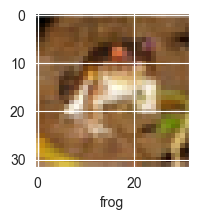

In [8]:
show_img(X_train,y_train,0)

In [9]:
# Normalizing the data by dividing it by 255
X_train=X_train/255
X_test=X_test/255
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

# Building the CNN

In [10]:
# first we do convolutional layers+ ReLU activation function and then pooling layer and after repeating it we do flatten and then dense layer
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2,)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

C:\Users\supriya shrivastv\PycharmProjects\DeepLearning\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
cnn.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [14]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 25ms/step - accuracy: 0.3818 - loss: 1.6868
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6004 - loss: 1.1407
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6558 - loss: 0.9939
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6893 - loss: 0.8993
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7099 - loss: 0.8314
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7379 - loss: 0.7610
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7574 - loss: 0.7089
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7733 - loss: 0.6563
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.7880 - loss: 0.6062
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7992 - loss: 0.5730


In [15]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6931 - loss: 0.9364


[0.9322757720947266, 0.6944000124931335]

In [21]:
y_pred=cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [22]:
y_pred[:5]
# here it is giving the probability of each class

array([[6.95287192e-04, 2.70085788e-04, 3.47140525e-03, 9.29201365e-01,
        1.22843811e-03, 4.32752743e-02, 5.68677671e-03, 1.90621169e-04,
        1.58515256e-02, 1.29149848e-04],
       [2.20733276e-03, 4.44687717e-02, 1.41140742e-06, 6.08553421e-07,
        2.38806365e-07, 6.26558787e-08, 6.86770996e-09, 7.15967285e-09,
        9.51568782e-01, 1.75274082e-03],
       [6.61236718e-02, 1.92449577e-02, 1.67040364e-03, 5.15627302e-03,
        5.99097693e-04, 1.43560334e-04, 4.35698894e-04, 2.39134673e-03,
        8.71982276e-01, 3.22528072e-02],
       [5.46603918e-01, 1.57065298e-02, 2.57403925e-02, 6.86067063e-03,
        2.10041367e-02, 3.81893115e-05, 1.39342470e-03, 3.10864445e-04,
        3.80256802e-01, 2.08507804e-03],
       [1.84121882e-06, 3.39177814e-06, 3.72950211e-02, 7.08409026e-02,
        7.82720387e-01, 4.05489141e-03, 1.05062135e-01, 4.80645804e-06,
        5.40257270e-06, 1.11388335e-05]], dtype=float32)

In [23]:
y_classes=[np.argmax(element) for element in y_pred]
# here we are taking the class with highest probability

In [24]:
y_classes[:5]

[3, 8, 8, 0, 4]

In [25]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [26]:
classes[y_classes[0]]

'cat'

TypeError: only integer scalar arrays can be converted to a scalar index

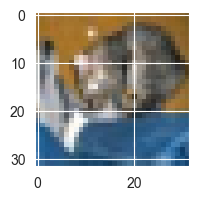

In [27]:
show_img(X_test,y_test,0)

In [28]:
classes[y_classes[3]]

'airplane'

TypeError: only integer scalar arrays can be converted to a scalar index

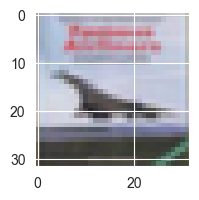

In [29]:
show_img(X_test,y_test,3)

# Confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_classes)

              precision    recall  f1-score   support

    airplane       0.60      0.83      0.70      1000
  automobile       0.85      0.75      0.80      1000
        bird       0.63      0.56      0.59      1000
         cat       0.55      0.52      0.53      1000
        deer       0.70      0.60      0.65      1000
         dog       0.61      0.59      0.60      1000
        frog       0.80      0.74      0.77      1000
       horse       0.71      0.79      0.75      1000
        ship       0.79      0.79      0.79      1000
       truck       0.75      0.78      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



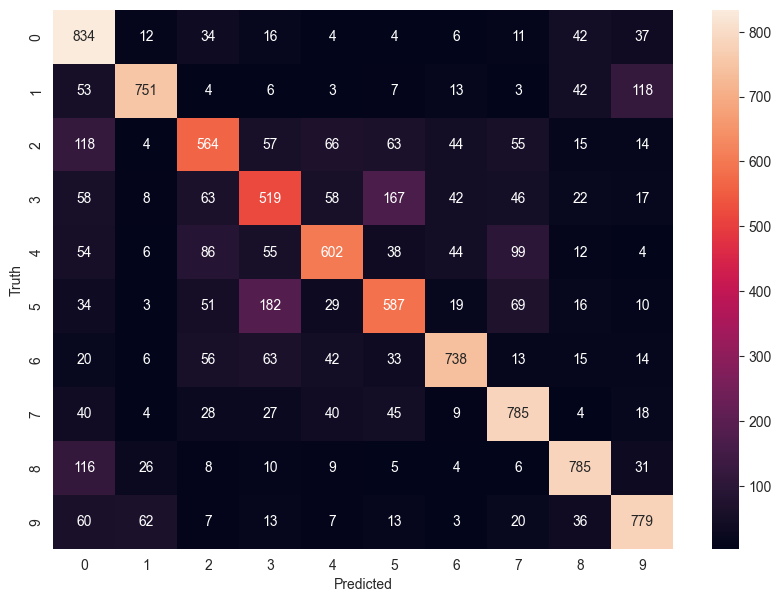

In [32]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
print(classification_report(y_test,y_classes,target_names=classes))